In [1]:
import pandas as pd

# Load the dataset
file_path = '/Users/user/Desktop/python projects/weather_info.csv'
weather_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(weather_df)


             Date       Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0        7/2/2014   CoffsHarbour     17.7     25.9       2.2          1.6   
1      23-04-2009       Portland      6.7     22.0       0.0          5.4   
2       8/11/2015       Watsonia      6.2     25.7       0.0          4.2   
3      21-11-2012     Wollongong     13.8     22.8       0.0          NaN   
4      30-07-2013     Townsville     13.4     27.2       0.0          6.0   
...           ...            ...      ...      ...       ...          ...   
99995  27-01-2013   AliceSprings     17.6     34.4       0.0         15.6   
99996  14-08-2010      Melbourne     10.2     15.9       0.0          3.8   
99997  26-10-2015  SydneyAirport     17.1     26.4       0.0          7.0   
99998    6/4/2012         Albany      NaN     17.9       0.8          3.8   
99999  21-03-2017          Perth     17.5     21.4       0.0          8.0   

       Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0

In [7]:
#Task-1

# Calculate the 75th percentile for wind speed and sunlight
wind_speed_75 = weather_df['WindGustSpeed'].quantile(0.75)
sunlight_75 = weather_df['Sunshine'].quantile(0.75)

print(f"75th percentile for wind speed: {wind_speed_75}")
print(f"75th percentile for sunlight hours: {sunlight_75}")

75th percentile for wind speed: 48.0
75th percentile for sunlight hours: 10.6


In [9]:
# Filter for windy places
windy_places = weather_df[weather_df['WindGustSpeed'] >= wind_speed_75]

# Filter for sunny places
sunny_places = weather_df[weather_df['Sunshine'] >= sunlight_75]

# Display the results
windy_places_info = windy_places[['Location', 'WindGustSpeed']].sort_values(by='WindGustSpeed', ascending=False)
sunny_places_info = sunny_places[['Location', 'Sunshine']].sort_values(by='Sunshine', ascending=False)

print("Windy places for windmill setup:")
print(windy_places_info)

print("\nSunny places for solar field setup:")
print(sunny_places_info)



Windy places for windmill setup:
         Location  WindGustSpeed
72545     Woomera          135.0
7197   Townsville          135.0
35513      Hobart          130.0
24271  Wollongong          126.0
54132     Woomera          122.0
...           ...            ...
21331        Sale           48.0
21349  WaggaWagga           48.0
54316  Townsville           48.0
54333       Uluru           48.0
20905   Nuriootpa           48.0

[24146 rows x 2 columns]

Sunny places for solar field setup:
           Location  Sunshine
80170       Mildura      14.5
61353     Nuriootpa      14.3
57670      Dartmoor      14.3
75820      Portland      14.3
79091        Hobart      14.2
...             ...       ...
70713        Darwin      10.6
90895  AliceSprings      10.6
895        Watsonia      10.6
8158     WaggaWagga      10.6
13773        Cairns      10.6

[13791 rows x 2 columns]


In [27]:
#Task-2

#As dataset has 2 columns in temp and humidity so we r going to take the avg among them at first
weather_df['Avg_temp']=(weather_df['MinTemp']+weather_df['MaxTemp'])/2
weather_df['Avg_humidity']=(weather_df['Humidity9am']+weather_df['Humidity3pm'])/2

#calculate 80th percentile of humidity and temp
humidity_80= weather_df['Avg_humidity'].quantile(0.80)
temp_80= weather_df['Avg_temp'].quantile(0.80)

print(f"80th percentile for average temperature: {temp_80}")
print(f"80th percentile for average humidity: {humidity_80}")

# Filter for locations with high average temperature and humidity
high_temp_humidity_locations = weather_df[(weather_df['Avg_temp'] >= temp_80) & (weather_df['Avg_humidity'] >= humidity_80)]

# Display the results
high_temp_humidity_info = high_temp_humidity_locations[['Location', 'Avg_temp', 'Avg_humidity']].sort_values(by=['Avg_temp', 'Avg_humidity'], ascending=False)

print("Locations with high average temperature and humidity:")
print(high_temp_humidity_info)

80th percentile for average temperature: 23.45
80th percentile for average humidity: 76.0
Locations with high average temperature and humidity:
           Location  Avg_temp  Avg_humidity
88621     Katherine     32.55          87.5
77408     Katherine     31.35          82.0
5170      Katherine     31.35          88.0
44306     Katherine     31.30          79.5
67332        Darwin     31.25          76.5
...             ...       ...           ...
88348  CoffsHarbour     23.45          78.5
79830     NorahHead     23.45          77.5
33587        Sydney     23.45          77.0
94228     NorahHead     23.45          77.0
97889    Wollongong     23.45          76.5

[1868 rows x 3 columns]


In [41]:
#Task-3

#lets set not too low level as 25th quantile and not too high level as 75th quantile
rainfall_q1= weather_df['Rainfall'].quantile(0.25)
rainfall_q3=weather_df['Rainfall'].quantile(0.75)

sunshine_q1= weather_df['Sunshine'].quantile(0.25)
sunshine_q3=weather_df['Sunshine'].quantile(0.75)

humidity_q1 = weather_df['Avg_humidity'].quantile(0.25)
humidity_q3 = weather_df['Avg_humidity'].quantile(0.75)

print(f"25th percentile (Q1) for Rainfall: {rainfall_q1}")
print(f"75th percentile (Q3) for Rainfall: {rainfall_q3}")
print(f"25th percentile (Q1) for Sunshine: {sunshine_q1}")
print(f"75th percentile (Q3) for Sunshine: {sunshine_q3}")
print(f"25th percentile (Q1) for Humidity: {humidity_q1}")
print(f"75th percentile (Q3) for Humidity: {humidity_q3}")


# Filter for places where rainfall, sunshine, and humidity
moderate_places=weather_df[
(weather_df['Rainfall'] >=rainfall_q1) & (weather_df['Rainfall'] <= rainfall_q3) &
(weather_df['Sunshine'] >= sunshine_q1) & (weather_df['Sunshine'] <= sunshine_q3) &
(weather_df['Avg_humidity'] >= humidity_q1) & (weather_df['Avg_humidity'] <= humidity_q3)
]

# Select 3 places with these moderate conditions
moderate_conditions_sample = moderate_places[['Location', 'Rainfall', 'Sunshine', 'Avg_humidity']].sample(n=3, random_state=42)

print("3 places with moderate rainfall, sunshine, and humidity:")
print(moderate_conditions_sample)


25th percentile (Q1) for Rainfall: 0.0
75th percentile (Q3) for Rainfall: 0.6
25th percentile (Q1) for Sunshine: 4.9
75th percentile (Q3) for Sunshine: 10.6
25th percentile (Q1) for Humidity: 48.5
75th percentile (Q3) for Humidity: 73.0
3 places with moderate rainfall, sunshine, and humidity:
            Location  Rainfall  Sunshine  Avg_humidity
24639  NorfolkIsland       0.0       9.6          56.0
14309     Townsville       0.0      10.0          54.5
10431     PearceRAAF       0.0       8.2          56.5


In [51]:
#Task-4

weather_df['Avg_cloudcover']=(weather_df['Cloud9am']+ weather_df['Cloud3pm'])/2

# Calculate the 75th percentile for rainfall (high) and 25th percentile for average cloud cover (low)
rainfall_75 = weather_df['Rainfall'].quantile(0.75)
cloud_cover_25 = weather_df['Avg_cloudcover'].quantile(0.25)

print(f"75th percentile for Rainfall: {rainfall_75}")
print(f"25th percentile for Average Cloud Cover: {cloud_cover_25}")

# Filter for high rainfall and low average cloud cover (cloud cover avg > 5)
high_rain_low_cloud = weather_df[(weather_df['Rainfall'] >= rainfall_75) & (weather_df['Avg_cloudcover'] <= cloud_cover_25) & (weather_df['Avg_cloudcover'] > 5)]

# Filter for low rainfall and high average cloud cover (cloud cover avg > 5)
low_rain_high_cloud = weather_df[(weather_df['Rainfall'] <= rainfall_75) & (weather_df['Avg_cloudcover'] >= cloud_cover_25) & (weather_df['Avg_cloudcover'] > 5)]

# Sort and select the top 3 locations for each scenario
top_3_high_rain_low_cloud = high_rain_low_cloud[['Location', 'Rainfall', 'Avg_cloudcover']].sort_values(by=['Rainfall', 'Avg_cloudcover'], ascending=[False, True]).head(3)
top_3_low_rain_high_cloud = low_rain_high_cloud[['Location', 'Rainfall', 'Avg_cloudcover']].sort_values(by=['Avg_cloudcover', 'Rainfall'], ascending=[False, True]).head(3)

print("Top 3 places with high rainfall and low cloud cover:")
print(top_3_high_rain_low_cloud)

print("\nTop 3 places with low rainfall and high cloud cover:")
print(top_3_low_rain_high_cloud)

75th percentile for Rainfall: 0.6
25th percentile for Average Cloud Cover: 2.0
Top 3 places with high rainfall and low cloud cover:
Empty DataFrame
Columns: [Location, Rainfall, Avg_cloudcover]
Index: []

Top 3 places with low rainfall and high cloud cover:
     Location  Rainfall  Avg_cloudcover
82     Albany       0.0             8.0
89   Portland       0.0             8.0
106  Brisbane       0.0             8.0


In [61]:
#Task-5

df_melted = weather_df.melt(id_vars=['Location', 'Rainfall'], value_vars=['WindDir9am', 'WindDir3pm'], 
                    var_name='Time', value_name='WindDirection')

rain_by_wind_direction= df_melted.groupby(['Location','WindDirection'])['Rainfall'].sum().reset_index()

# Find the wind direction with the highest rainfall for each city
max_rain_wind_direction = rain_by_wind_direction.loc[rain_by_wind_direction.groupby('Location')['Rainfall'].idxmax()]

print("Wind direction causing the most rainfall in different cities:")
print(max_rain_wind_direction)

Wind direction causing the most rainfall in different cities:
             Location WindDirection  Rainfall
15           Adelaide           WSW    1136.8
31             Albany           WSW    1358.5
46             Albury           WNW    1248.6
48       AliceSprings             E     604.8
76      BadgerysCreek            SW    1319.6
91           Ballarat           SSW    1022.0
110           Bendigo           WNW     844.4
121          Brisbane            SE    1591.6
138            Cairns           SSE    7413.3
151          Canberra            NW    1598.7
172             Cobar            SW     435.6
188      CoffsHarbour            SW    4191.2
207          Dartmoor           WSW    1117.2
222            Darwin           WNW    3670.2
234         GoldCoast           SSE    2632.6
251            Hobart           SSW    1235.0
270         Katherine           WNW    1031.8
278        Launceston           NNW    2385.0
303         Melbourne           WSW    1059.0
312  MelbourneAirp

In [69]:
#Task-6

mean_evap=weather_df['Evaporation'].mean()


# Filter the cities where evaporation is higher than the mean
high_evap_cities= weather_df[weather_df['Evaporation']> mean_evap]

top_5= high_evap_cities.sort_values(by='Evaporation',ascending=False).head(5)

top_5[['Location','Evaporation']]

,Location,Evaporation
29867,Williamtown,145.0
28413,Cobar,86.2
96990,Woomera,82.4
23713,Woomera,81.2
21307,Woomera,77.3


Cross-tabulation between rainfall level and wind direction:
WindGustDir        E   ENE   ESE     N    NE   NNE   NNW    NW     S    SE  \
rainfall_level                                                               
heavy           6405  5689  5156  6240  4973  4520  4639  5665  6231  6508   

WindGustDir      SSE   SSW    SW     W   WNW   WSW  
rainfall_level                                      
heavy           6320  6088  6193  6857  5667  6268  


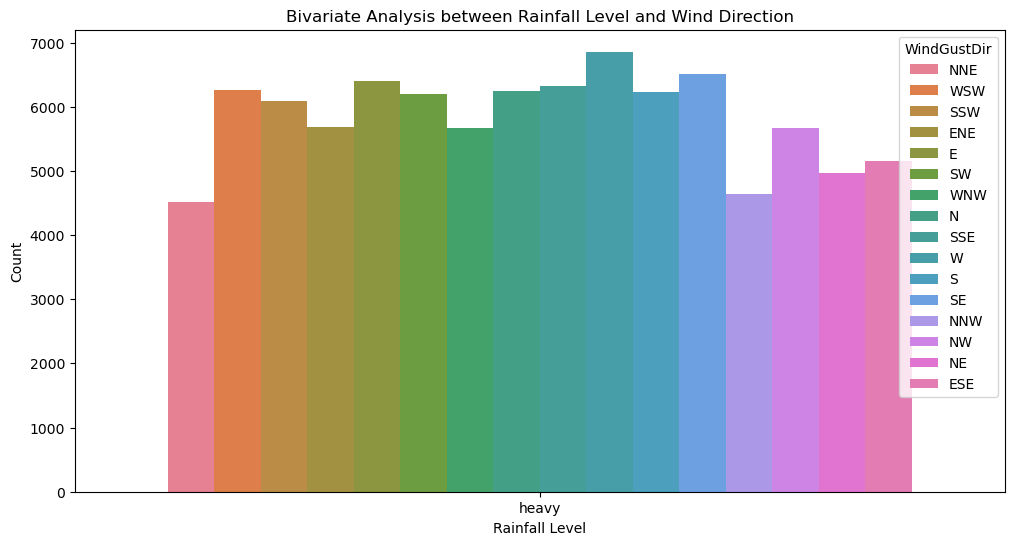

In [89]:
#Task-9

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

percentiles = np.percentile(weather_df['Rainfall'], [0, 25, 50, 75, 100])

def categorize_rainfall(rainfall):
    if rainfall == percentiles[0]:
        return 'no'
    elif rainfall <= percentiles[1]:
        return 'low'
    elif rainfall <= percentiles[2]:
        return 'medium'
    elif rainfall <= percentiles[3]:
        return 'high'
    else:
        return 'heavy'

weather_df['rainfall_level']=weather_df['Rainfall'].apply(categorize_rainfall)
cross_tab = pd.crosstab(weather_df['rainfall_level'], weather_df['WindGustDir'])

# Display the cross-tabulation
print("Cross-tabulation between rainfall level and wind direction:")
print(cross_tab)

# Visualize the relationship with a countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=weather_df, x='rainfall_level', hue='WindGustDir')
plt.title('Bivariate Analysis between Rainfall Level and Wind Direction')
plt.xlabel('Rainfall Level')
plt.ylabel('Count')
plt.show()

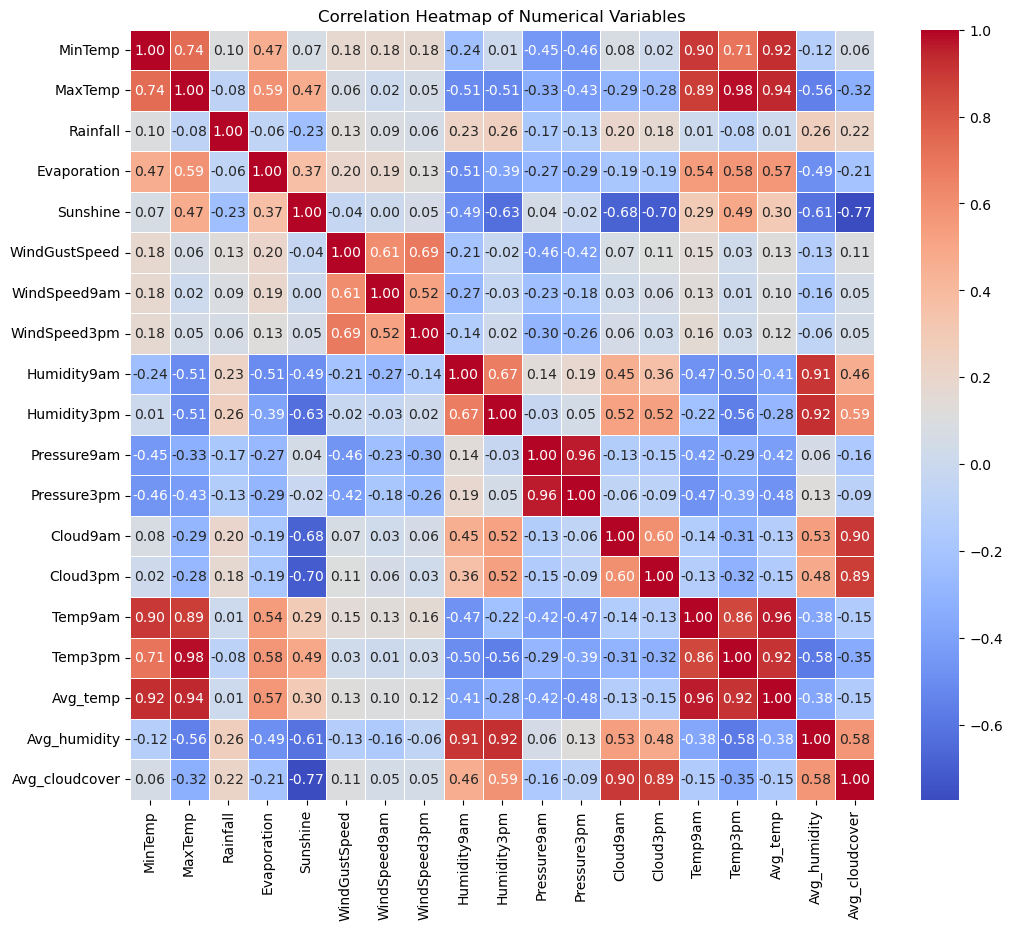

In [93]:
#Task-10

numerical_df = weather_df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [107]:
#Task-7

weather_df['Date'] = pd.to_datetime(weather_df['Date'], format='mixed', dayfirst=True, errors='coerce')

# Check for any conversion errors and drop rows with invalid dates if necessary
weather_df = weather_df.dropna(subset=['Date'])

# Extract the month name from the 'Date' column
weather_df['Month'] = weather_df['Date'].dt.month_name()


winter_temp_threshold = 10

# Identify cities and months where the temperature is below the threshold
cold_months_df = weather_df[weather_df['Avg_temp'] < winter_temp_threshold]

# Group by city and count the number of cold months per city
cold_months_count = cold_months_df.groupby('Location')['Date'].count().reset_index()
cold_months_count.columns = ['Location', 'ColdMonthsCount']

# Sort cities by the number of cold months in descending order
coldest_cities = cold_months_count.sort_values(by='ColdMonthsCount', ascending=False)

# Display the top cities with the most cold months
print("Cities with the most cold months (suitable for winter goods promotion):")
print(coldest_cities)

# Optionally, identify specific months to target in these cities
coldest_months_per_city = cold_months_df.groupby('Location')['Date'].apply(list).reset_index()
coldest_months_per_city.columns = ['Location', 'ColdMonths']

print("\nSuggested promotion months for winter goods in each city:")
print(coldest_months_per_city)

Cities with the most cold months (suitable for winter goods promotion):
            Location  ColdMonthsCount
18       MountGinini             1239
5           Ballarat              820
7           Canberra              803
33       Tuggeranong              677
12        Launceston              584
6            Bendigo              538
11            Hobart              519
35        WaggaWagga              515
2             Albury              483
29              Sale              436
22         Nuriootpa              394
10          Dartmoor              383
17      MountGambier              347
14  MelbourneAirport              318
37          Watsonia              302
27          Portland              296
15           Mildura              215
30        SalmonGums              197
20              Nhil              196
8              Cobar              175
28          Richmond              149
3       AliceSprings              145
4      BadgerysCreek              132
16             M